In [1]:
%%javascript
IPython.notebook.save_notebook()
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [2]:
# #exclude
# from ffwdpy import JupNb
# jupnb = JupNb()
# jupnb.write_nb2py(nb_name)

In [3]:
%%javascript

IPython.tab_as_tab_everywhere = function(use_tabs) {
	if (use_tabs === undefined) {
		use_tabs = true; 
	}

	// apply setting to all current CodeMirror instances
	IPython.notebook.get_cells().map(
		function(c) {  return c.code_mirror.options.indentWithTabs=use_tabs;  }
	);
	// make sure new CodeMirror instances created in the future also use this setting
	CodeMirror.defaults.indentWithTabs=use_tabs;
	
	};

IPython.tab_as_tab_everywhere()

<IPython.core.display.Javascript object>

In [4]:
# GPU setup
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="8"

# Import Necessary Packages

In [5]:
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import numpy as np
import torch
from tqdm.notebook import tqdm
from torchvision import transforms
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image
import torchvision   
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import sklearn
from torch import nn
from torch.nn.utils.rnn import *
import fnmatch
from torch.utils.tensorboard import SummaryWriter


cuda = torch.cuda.is_available()
print("cuda", cuda)
num_workers = 8 if cuda else 0
print(num_workers)
print("Torch version:", torch.__version__)

cuda True
8
Torch version: 1.7.1+cu110


In [6]:
templates = [
	'a bad photo of a {}.',
	'a photo of many {}.',
	'a sculpture of a {}.',
	'a photo of the hard to see {}.',
	'a low resolution photo of the {}.',
	'a rendering of a {}.',
	'graffiti of a {}.',
	'a bad photo of the {}.',
	'a cropped photo of the {}.',
	'a tattoo of a {}.',
	'the embroidered {}.',
	'a photo of a hard to see {}.',
	'a bright photo of a {}.',
	'a photo of a clean {}.',
	'a photo of a dirty {}.',
	'a dark photo of the {}.',
	'a drawing of a {}.',
	'a photo of my {}.',
	'the plastic {}.',
	'a photo of the cool {}.',
	'a close-up photo of a {}.',
	'a black and white photo of the {}.',
	'a painting of the {}.',
	'a painting of a {}.',
	'a pixelated photo of the {}.',
	'a sculpture of the {}.',
	'a bright photo of the {}.',
	'a cropped photo of a {}.',
	'a plastic {}.',
	'a photo of the dirty {}.',
	'a jpeg corrupted photo of a {}.',
	'a blurry photo of the {}.',
	'a photo of the {}.',
	'a good photo of the {}.',
	'a rendering of the {}.',
	'a {} in a video game.',
	'a photo of one {}.',
	'a doodle of a {}.',
	'a close-up photo of the {}.',
	'a photo of a {}.',
	'the origami {}.',
	'the {} in a video game.',
	'a sketch of a {}.',
	'a doodle of the {}.',
	'a origami {}.',
	'a low resolution photo of a {}.',
	'the toy {}.',
	'a rendition of the {}.',
	'a photo of the clean {}.',
	'a photo of a large {}.',
	'a rendition of a {}.',
	'a photo of a nice {}.',
	'a photo of a weird {}.',
	'a blurry photo of a {}.',
	'a cartoon {}.',
	'art of a {}.',
	'a sketch of the {}.',
	'a embroidered {}.',
	'a pixelated photo of a {}.',
	'itap of the {}.',
	'a jpeg corrupted photo of the {}.',
	'a good photo of a {}.',
	'a plushie {}.',
	'a photo of the nice {}.',
	'a photo of the small {}.',
	'a photo of the weird {}.',
	'the cartoon {}.',
	'art of the {}.',
	'a drawing of the {}.',
	'a photo of the large {}.',
	'a black and white photo of a {}.',
	'the plushie {}.',
	'a dark photo of a {}.',
	'itap of a {}.',
	'graffiti of the {}.',
	'a toy {}.',
	'itap of my {}.',
	'a photo of a cool {}.',
	'a photo of a small {}.',
	'a tattoo of the {}.',]

In [7]:
classnames = ['abseiling',
	'acting_in_play',
	'adjusting_glasses',
	'air_drumming',
	'alligator_wrestling',
	'answering_questions',
	'applauding',
	'applying_cream',
	'archaeological_excavation',
	'archery',
	'arguing',
	'arm_wrestling',
	'arranging_flowers',
	'assembling_bicycle',
	'assembling_computer',
	'attending_conference',
	'auctioning',
	'baby_waking_up',
	'backflip_(human)',
	'baking_cookies',
	'balloon_blowing',
	'bandaging',
	'barbequing',
	'bartending',
	'base_jumping',
	'bathing_dog',
	'battle_rope_training',
	'beatboxing',
	'bee_keeping',
	'belly_dancing',
	'bench_pressing',
	'bending_back',
	'bending_metal',
	'biking_through_snow',
	'blasting_sand',
	'blowdrying_hair',
	'blowing_bubble_gum',
	'blowing_glass',
	'blowing_leaves',
	'blowing_nose',
	'blowing_out_candles',
	'bobsledding',
	'bodysurfing',
	'bookbinding',
	'bottling',
	'bouncing_on_bouncy_castle',
	'bouncing_on_trampoline',
	'bowling',
	'braiding_hair',
	'breading_or_breadcrumbing',
	'breakdancing',
	'breaking_boards',
	'breathing_fire',
	'brushing_hair',
	'brushing_teeth',
	'brush_painting',
	'building_cabinet',
	'building_lego',
	'building_sandcastle',
	'building_shed',
	'bulldozing',
	'bull_fighting',
	'bungee_jumping',
	'burping',
	'busking',
	'calculating',
	'calligraphy',
	'canoeing_or_kayaking',
	'capoeira',
	'capsizing',
	'card_stacking',
	'card_throwing',
	'carrying_baby',
	'cartwheeling',
	'carving_ice',
	'carving_pumpkin',
	'casting_fishing_line',
	'catching_fish',
	'catching_or_throwing_baseball',
	'catching_or_throwing_frisbee',
	'catching_or_throwing_softball',
	'celebrating',
	'changing_gear_in_car',
	'changing_oil',
	'changing_wheel',
	'changing_wheel_(not_on_bike)',
	'checking_tires',
	'cheerleading',
	'chewing_gum',
	'chiseling_stone',
	'chiseling_wood',
	'chopping_meat',
	'chopping_vegetables',
	'chopping_wood',
	'clam_digging',
	'clapping',
	'clay_pottery_making',
	'clean_and_jerk',
	'cleaning_floor',
	'cleaning_gutters',
	'cleaning_pool',
	'cleaning_shoes',
	'cleaning_toilet',
	'cleaning_windows',
	'climbing_a_rope',
	'climbing_ladder',
	'climbing_tree',
	'coloring_in',
	'combing_hair',
	'contact_juggling',
	'contorting',
	'cooking_chicken',
	'cooking_egg',
	'cooking_on_campfire',
	'cooking_sausages',
	'cooking_sausages_(not_on_barbeque)',
	'cooking_scallops',
	'cosplaying',
	'counting_money',
	'country_line_dancing',
	'cracking_back',
	'cracking_knuckles',
	'cracking_neck',
	'crawling_baby',
	'crossing_eyes',
	'crossing_river',
	'crying',
	'cumbia',
	'curling_hair',
	'curling_(sport)',
	'cutting_nails',
	'cutting_orange',
	'cutting_pineapple',
	'cutting_watermelon',
	'dancing_ballet',
	'dancing_charleston',
	'dancing_gangnam_style',
	'dancing_macarena',
	'deadlifting',
	'decorating_the_christmas_tree',
	'delivering_mail',
	'digging',
	'dining',
	'directing_traffic',
	'disc_golfing',
	'diving_cliff',
	'docking_boat',
	'dodgeball',
	'doing_aerobics',
	'doing_jigsaw_puzzle',
	'doing_laundry',
	'doing_nails',
	'drawing',
	'dribbling_basketball',
	'drinking',
	'drinking_beer',
	'drinking_shots',
	'driving_car',
	'driving_tractor',
	'drooling',
	'drop_kicking',
	'drumming_fingers',
	'dumpster_diving',
	'dunking_basketball',
	'dyeing_eyebrows',
	'dying_hair',
	'eating_burger',
	'eating_cake',
	'eating_carrots',
	'eating_chips',
	'eating_doughnuts',
	'eating_hotdog',
	'eating_ice_cream',
	'eating_spaghetti',
	'eating_watermelon',
	'egg_hunting',
	'embroidering',
	'exercising_arm',
	'exercising_with_an_exercise_ball',
	'extinguishing_fire',
	'faceplanting',
	'falling_off_bike',
	'falling_off_chair',
	'feeding_birds',
	'feeding_fish',
	'feeding_goats',
	'fencing_(sport)',
	'fidgeting',
	'filling_eyebrows',
	'finger_snapping',
	'fixing_bicycle',
	'fixing_hair',
	'flint_knapping',
	'flipping_pancake',
	'flying_kite',
	'fly_tying',
	'folding_clothes',
	'folding_napkins',
	'folding_paper',
	'front_raises',
	'frying_vegetables',
	'garbage_collecting',
	'gargling',
	'geocaching',
	'getting_a_haircut',
	'getting_a_piercing',
	'getting_a_tattoo',
	'giving_or_receiving_award',
	'gold_panning',
	'golf_chipping',
	'golf_driving',
	'golf_putting',
	'gospel_singing_in_church',
	'grinding_meat',
	'grooming_dog',
	'grooming_horse',
	'gymnastics_tumbling',
	'hammer_throw',
	'hand_washing_clothes',
	'headbanging',
	'headbutting',
	'head_stand',
	'high_jump',
	'high_kick',
	'historical_reenactment',
	'hitting_baseball',
	'hockey_stop',
	'holding_snake',
	'home_roasting_coffee',
	'hopscotch',
	'hoverboarding',
	'huddling',
	'hugging',
	'hugging_baby',
	'hula_hooping',
	'hurdling',
	'hurling_(sport)',
	'ice_climbing',
	'ice_fishing',
	'ice_skating',
	'ice_swimming',
	'inflating_balloons',
	'installing_carpet',
	'ironing',
	'ironing_hair',
	'javelin_throw',
	'jaywalking',
	'jetskiing',
	'jogging',
	'juggling_balls',
	'juggling_fire',
	'juggling_soccer_ball',
	'jumping_bicycle',
	'jumping_into_pool',
	'jumping_jacks',
	'jumpstyle_dancing',
	'karaoke',
	'kicking_field_goal',
	'kicking_soccer_ball',
	'kissing',
	'kitesurfing',
	'knitting',
	'krumping',
	'laughing',
	'lawn_mower_racing',
	'laying_bricks',
	'laying_concrete',
	'laying_stone',
	'laying_tiles',
	'leatherworking',
	'licking',
	'lifting_hat',
	'lighting_fire',
	'lock_picking',
	'longboarding',
	'long_jump',
	'looking_at_phone',
	'luge',
	'lunge',
	'making_a_cake',
	'making_a_sandwich',
	'making_balloon_shapes',
	'making_bed',
	'making_bubbles',
	'making_cheese',
	'making_horseshoes',
	'making_jewelry',
	'making_paper_aeroplanes',
	'making_pizza',
	'making_snowman',
	'making_sushi',
	'making_tea',
	'making_the_bed',
	'marching',
	'marriage_proposal',
	'massaging_back',
	'massaging_feet',
	'massaging_legs',
	'massaging_person\'s_head',
	'milking_cow',
	'moon_walking',
	'mopping_floor',
	'mosh_pit_dancing',
	'motorcycling',
	'mountain_climber_(exercise)',
	'moving_furniture',
	'mowing_lawn',
	'mushroom_foraging',
	'needle_felting',
	'news_anchoring',
	'opening_bottle',
	'opening_door',
	'opening_present',
	'opening_refrigerator',
	'paragliding',
	'parasailing',
	'parkour',
	'passing_American_football_(in_game)',
	'passing_American_football_(not_in_game)',
	'passing_soccer_ball',
	'peeling_apples',
	'peeling_potatoes',
	'person_collecting_garbage',
	'petting_animal_(not_cat)',
	'petting_cat',
	'photobombing',
	'photocopying',
	'picking_fruit',
	'pillow_fight',
	'pinching',
	'pirouetting',
	'planing_wood',
	'planting_trees',
	'plastering',
	'playing_accordion',
	'playing_badminton',
	'playing_bagpipes',
	'playing_basketball',
	'playing_bass_guitar',
	'playing_beer_pong',
	'playing_blackjack',
	'playing_cards',
	'playing_cello',
	'playing_chess',
	'playing_clarinet',
	'playing_controller',
	'playing_cricket',
	'playing_cymbals',
	'playing_darts',
	'playing_didgeridoo',
	'playing_dominoes',
	'playing_drums',
	'playing_field_hockey',
	'playing_flute',
	'playing_gong',
	'playing_guitar',
	'playing_hand_clapping_games',
	'playing_harmonica',
	'playing_harp',
	'playing_ice_hockey',
	'playing_keyboard',
	'playing_kickball',
	'playing_laser_tag',
	'playing_lute',
	'playing_maracas',
	'playing_marbles',
	'playing_monopoly',
	'playing_netball',
	'playing_ocarina',
	'playing_organ',
	'playing_paintball',
	'playing_pan_pipes',
	'playing_piano',
	'playing_pinball',
	'playing_ping_pong',
	'playing_poker',
	'playing_polo',
	'playing_recorder',
	'playing_rubiks_cube',
	'playing_saxophone',
	'playing_scrabble',
	'playing_squash_or_racquetball',
	'playing_tennis',
	'playing_trombone',
	'playing_trumpet',
	'playing_ukulele',
	'playing_violin',
	'playing_volleyball',
	'playing_with_trains',
	'playing_xylophone',
	'poking_bellybutton',
	'pole_vault',
	'polishing_metal',
	'popping_balloons',
	'pouring_beer',
	'preparing_salad',
	'presenting_weather_forecast',
	'pull_ups',
	'pumping_fist',
	'pumping_gas',
	'punching_bag',
	'punching_person_(boxing)',
	'pushing_car',
	'pushing_cart',
	'pushing_wheelbarrow',
	'pushing_wheelchair',
	'push_up',
	'putting_in_contact_lenses',
	'putting_on_eyeliner',
	'putting_on_foundation',
	'putting_on_lipstick',
	'putting_on_mascara',
	'putting_on_sari',
	'putting_on_shoes',
	'raising_eyebrows',
	'reading_book',
	'reading_newspaper',
	'recording_music',
	'repairing_puncture',
	'riding_a_bike',
	'riding_camel',
	'riding_elephant',
	'riding_mechanical_bull',
	'riding_mountain_bike',
	'riding_mule',
	'riding_or_walking_with_horse',
	'riding_scooter',
	'riding_snow_blower',
	'riding_unicycle',
	'ripping_paper',
	'roasting_marshmallows',
	'roasting_pig',
	'robot_dancing',
	'rock_climbing',
	'rock_scissors_paper',
	'roller_skating',
	'rolling_pastry',
	'rope_pushdown',
	'running_on_treadmill',
	'sailing',
	'salsa_dancing',
	'sanding_floor',
	'sausage_making',
	'sawing_wood',
	'scrambling_eggs',
	'scrapbooking',
	'scrubbing_face',
	'scuba_diving',
	'separating_eggs',
	'setting_table',
	'sewing',
	'shaking_hands',
	'shaking_head',
	'shaping_bread_dough',
	'sharpening_knives',
	'sharpening_pencil',
	'shaving_head',
	'shaving_legs',
	'shearing_sheep',
	'shining_flashlight',
	'shining_shoes',
	'shooting_basketball',
	'shooting_goal_(soccer)',
	'shopping',
	'shot_put',
	'shoveling_snow',
	'shredding_paper',
	'shucking_oysters',
	'shuffling_cards',
	'shuffling_feet',
	'side_kick',
	'sign_language_interpreting',
	'singing',
	'sipping_cup',
	'situp',
	'skateboarding',
	'skiing_crosscountry',
	'skiing_mono',
	'skiing_(not_slalom_or_crosscountry)',
	'skiing_slalom',
	'ski_jumping',
	'skipping_rope',
	'skipping_stone',
	'skydiving',
	'slacklining',
	'slapping',
	'sled_dog_racing',
	'sleeping',
	'smashing',
	'smoking',
	'smoking_hookah',
	'smoking_pipe',
	'snatch_weight_lifting',
	'sneezing',
	'sniffing',
	'snorkeling',
	'snowboarding',
	'snowkiting',
	'snowmobiling',
	'somersaulting',
	'spelunking',
	'spinning_poi',
	'spraying',
	'spray_painting',
	'springboard_diving',
	'square_dancing',
	'squat',
	'standing_on_hands',
	'staring',
	'steer_roping',
	'sticking_tongue_out',
	'stomping_grapes',
	'stretching_arm',
	'stretching_leg',
	'strumming_guitar',
	'sucking_lolly',
	'surfing_crowd',
	'surfing_water',
	'sweeping_floor',
	'swimming_backstroke',
	'swimming_breast_stroke',
	'swimming_butterfly_stroke',
	'swimming_front_crawl',
	'swing_dancing',
	'swinging_baseball_bat',
	'swinging_legs',
	'swinging_on_something',
	'sword_fighting',
	'sword_swallowing',
	'tackling',
	'tagging_graffiti',
	'tai_chi',
	'taking_a_shower',
	'talking_on_cell_phone',
	'tango_dancing',
	'tap_dancing',
	'tapping_guitar',
	'tapping_pen',
	'tasting_beer',
	'tasting_food',
	'tasting_wine',
	'testifying',
	'texting',
	'threading_needle',
	'throwing_axe',
	'throwing_ball',
	'throwing_discus',
	'throwing_knife',
	'throwing_snowballs',
	'throwing_tantrum',
	'throwing_water_balloon',
	'tickling',
	'tie_dying',
	'tightrope_walking',
	'tiptoeing',
	'tobogganing',
	'tossing_coin',
	'tossing_salad',
	'training_dog',
	'trapezing',
	'trimming_or_shaving_beard',
	'trimming_shrubs',
	'trimming_trees',
	'triple_jump',
	'twiddling_fingers',
	'tying_bow_tie',
	'tying_knot_(not_on_a_tie)',
	'tying_shoe_laces',
	'tying_tie',
	'unboxing',
	'unloading_truck',
	'using_a_microscope',
	'using_a_paint_roller',
	'using_a_power_drill',
	'using_a_sledge_hammer',
	'using_atm',
	'using_a_wrench',
	'using_bagging_machine',
	'using_circular_saw',
	'using_computer',
	'using_inhaler',
	'using_puppets',
	'using_remote_controller_(not_gaming)',
	'using_segway',
	'vacuuming_floor',
	'vault',
	'visiting_the_zoo',
	'wading_through_mud',
	'wading_through_water',
	'waiting_in_line',
	'waking_up',
	'walking_the_dog',
	'walking_through_snow',
	'washing_dishes',
	'washing_feet',
	'washing_hair',
	'washing_hands',
	'watching_tv',
	'watering_plants',
	'water_skiing',
	'water_sliding',
	'waving_hand',
	'waxing_back',
	'waxing_chest',
	'waxing_eyebrows',
	'waxing_legs',
	'weaving_basket',
	'weaving_fabric',
	'welding',
	'whistling',
	'windsurfing',
	'winking',
	'wood_burning_(art)',
	'wrapping_present',
	'wrestling',
	'writing',
	'yawning',
	'yoga',
	'zumba',
]
classnames = ['making tea',
		  'shaking head',
		  'skiing slalom',
		  'bobsledding',
		  'high kick',
		  'scrambling eggs',
		  'bee keeping',
		  'swinging on something',
		  'washing hands',
		  'laying bricks',
		  'push up',
		  'doing nails',
		  'massaging legs',
		  'using computer',
		  'clapping',
		  'drinking beer',
		  'eating chips',
		  'riding mule',
		  'petting animal (not cat)',
		  'frying vegetables',
		  'skiing (not slalom or crosscountry)',
		  'snowkiting',
		  'massaging person’s head',
		  'cutting nails',
		  'picking fruit']

map_id = {}
i=0
for classname in classnames:
	map_id[classname]=i
	i+=1

In [8]:
import clip 
model, _ = clip.load("RN50") 
def zeroshot_classifier(classnames, act_descriptions):
	with torch.no_grad():
		zeroshot_weights = []
		for classname in classnames:
			texts = [template.format(classname) for template in templates]
			# pdb.set_trace()
			texts = clip.tokenize(texts).cuda() #tokenize
			class_embeddings = model.encode_text(texts) #embed with text encoder
			class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
			class_embedding = class_embeddings.mean(dim=0)
			class_embedding /= class_embedding.norm()
			zeroshot_weights.append(class_embedding)
		zeroshot_weights = torch.stack(zeroshot_weights, dim=1).cuda()
	return zeroshot_weights
classnames_str = {x:x.replace('_', ' ') for x in classnames}
zeroshot_weights = zeroshot_classifier(classnames, classnames_str)

In [9]:
# Model - 1
class Embedder(nn.Module):
	def __init__(self, vocab_size, d_model):
		super().__init__()
		self.embed = nn.Embedding(vocab_size, d_model)
	def forward(self, x):
		return self.embed(x)

class PositionalEncoder(nn.Module):
	def __init__(self, d_model, max_seq_len = 80):
		super().__init__()
		self.d_model = d_model

		# create constant 'pe' matrix with values dependant on 
		# pos and i
		pe = torch.zeros(max_seq_len, d_model)
		for pos in range(max_seq_len):
			for i in range(0, d_model, 2):
				pe[pos, i] = \
				math.sin(pos / (10000 ** ((2 * i)/d_model)))
				pe[pos, i + 1] = \
				math.cos(pos / (10000 ** ((2 * (i + 1))/d_model)))

		pe = pe.unsqueeze(0)
		self.register_buffer('pe', pe)


	def forward(self, x):
		# make embeddings relatively larger
		x = x * math.sqrt(self.d_model)
		#add constant to embedding
		seq_len = x.size(1)
		x = x + Variable(self.pe[:,:seq_len], \
		requires_grad=False).cuda()
		return x

class MultiHeadAttention(nn.Module):
	def __init__(self, heads, d_model, dropout = 0.1):
		super().__init__()

		self.d_model = d_model
		self.d_k = d_model // heads
		self.h = heads

		self.q_linear = nn.Linear(d_model, d_model)
		self.v_linear = nn.Linear(d_model, d_model)
		self.k_linear = nn.Linear(d_model, d_model)
		self.dropout = nn.Dropout(dropout)
		self.out = nn.Linear(d_model, d_model)

	def forward(self, q, k, v, mask=None):

		bs = q.size(0)

		# perform linear operation and split into h heads

		k = self.k_linear(k).view(bs, -1, self.h, self.d_k)
		q = self.q_linear(q).view(bs, -1, self.h, self.d_k)
		v = self.v_linear(v).view(bs, -1, self.h, self.d_k)

		# transpose to get dimensions bs * h * sl * d_model

		k = k.transpose(1,2)
		q = q.transpose(1,2)
		v = v.transpose(1,2)

	# calculate attention using function we will define next
		scores = attention(q, k, v, self.d_k, mask, self.dropout)

		# concatenate heads and put through final linear layer
		concat = scores.transpose(1,2).contiguous()\
		.view(bs, -1, self.d_model)

		output = self.out(concat)

		return output

def attention(q, k, v, d_k, mask=None, dropout=None):

	scores = torch.matmul(q, k.transpose(-2, -1)) /  math.sqrt(d_k)

	if mask is not None:
		mask = mask.unsqueeze(1)
		scores = scores.masked_fill(mask == 0, -1e9)
	scores = F.softmax(scores, dim=-1)

	if dropout is not None:
		scores = dropout(scores)

	output = torch.matmul(scores, v)
	return output

class FeedForward(nn.Module):
	def __init__(self, d_model, d_ff=2048, dropout = 0.1):
		super().__init__() 
		# We set d_ff as a default to 2048
		self.linear_1 = nn.Linear(d_model, d_ff)
		self.dropout = nn.Dropout(dropout)
		self.linear_2 = nn.Linear(d_ff, d_model)
	def forward(self, x):
		x = self.dropout(F.relu(self.linear_1(x)))
		x = self.linear_2(x)
		return x
class Norm(nn.Module):
	def __init__(self, d_model, eps = 1e-6):
		super().__init__()

		self.size = d_model
		# create two learnable parameters to calibrate normalisation
		self.alpha = nn.Parameter(torch.ones(self.size))
		self.bias = nn.Parameter(torch.zeros(self.size))
		self.eps = eps
	def forward(self, x):
		norm = self.alpha * (x - x.mean(dim=-1, keepdim=True)) \
		/ (x.std(dim=-1, keepdim=True) + self.eps) + self.bias
		return norm

# build an encoder layer with one multi-head attention layer and one # feed-forward layer
class EncoderLayer(nn.Module):
	def __init__(self, d_model, heads, dropout = 0.1):
		super().__init__()
		self.norm_1 = Norm(d_model)
		self.norm_2 = Norm(d_model)
		self.attn = MultiHeadAttention(heads, d_model)
		self.ff = FeedForward(d_model)
		self.dropout_1 = nn.Dropout(dropout)
		self.dropout_2 = nn.Dropout(dropout)

	def forward(self, x, mask):
		x2 = self.norm_1(x)
		x = x + self.dropout_1(self.attn(x2,x2,x2,mask))
		x2 = self.norm_2(x)
		x = x + self.dropout_2(self.ff(x2))
		return x
class Encoder(nn.Module):
	def __init__(self, vocab_size, d_model, N, heads):
		super().__init__()
		self.N = N
		self.embed = Embedder(vocab_size, d_model)
		self.pe = PositionalEncoder(d_model)
		self.layers = get_clones(EncoderLayer(d_model, heads), N)
		self.norm = Norm(d_model)
	def forward(self, src, mask):
		x = self.embed(src)
		x = self.pe(x)
		for i in range(N):
			x = self.layers[i](x, mask)
		return self.norm(x)

In [10]:
# Model - 2

import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer


class PositionalEncoding(nn.Module):

	def __init__(self, d_model, dropout=0.1, max_len=5000):
		super(PositionalEncoding, self).__init__()
		self.dropout = nn.Dropout(p=dropout)

		pe = torch.zeros(max_len, d_model)
		position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
		div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
		pe[:, 0::2] = torch.sin(position * div_term)
		pe[:, 1::2] = torch.cos(position * div_term)
		pe = pe.unsqueeze(0).transpose(0, 1)
		self.register_buffer('pe', pe)

	def forward(self, x):
		x = x + self.pe[:x.size(0), :]
		return self.dropout(x)
class Transformer_Model(nn.Module):

	def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
		super(Transformer_Model, self).__init__()
		self.pos_encoder = PositionalEncoding(ninp, dropout)
		encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
		self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
		self.encoder = nn.Embedding(ntoken, ninp)
		self.ninp = ninp
		self.decoder = nn.Linear(ninp, ntoken)

		self.init_weights()

	def generate_square_subsequent_mask(self, sz):
		mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
		mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
		return mask

	def init_weights(self):
		initrange = 0.1
		self.encoder.weight.data.uniform_(-initrange, initrange)
		self.decoder.bias.data.zero_()
		self.decoder.weight.data.uniform_(-initrange, initrange)

	def forward(self, src):
		src = self.encoder(src) * math.sqrt(self.ninp)
		src = self.pos_encoder(src)
		output = self.transformer_encoder(src)
		output = self.decoder(output)
		return output

In [11]:
# Model - 3
class Transformer_Model(nn.Module):
	def __init__(self, spacial_dim: int, embed_dim: int, num_heads: int, 
				 output_dim: int = None, use_projection: bool = True):
		super().__init__()
		self.positional_embedding = nn.Parameter(torch.randn(spacial_dim ** 2 + 1, embed_dim) / embed_dim ** 0.5)
		self.k_proj = nn.Linear(embed_dim, embed_dim)
		self.q_proj = nn.Linear(embed_dim, embed_dim)
		self.v_proj = nn.Linear(embed_dim, embed_dim)
		self.c_proj = nn.Linear(embed_dim, output_dim or embed_dim)
		self.num_heads = num_heads
		self.use_projection = use_projection
		if self.use_projection:
			self.projection = nn.Linear(output_dim, NUM_CLASSES,bias=False)
			self.projection.weight = torch.nn.Parameter(zeroshot_weights.float().T.clone(), requires_grad=False)

	def forward(self, x):
		# x = x.reshape(x.shape[0], x.shape[1], x.shape[2] * x.shape[3]).permute(2, 0, 1)  # NCHW -> (HW)NC
		x = x.permute(1, 0, 2)
		x = torch.cat([x.mean(dim=0, keepdim=True), x], dim=0)  # (HW+1)NC
		x = x + self.positional_embedding[:, None, :].to(x.dtype)  # (HW+1)NC
		x, xw = F.multi_head_attention_forward(
			query=x, key=x, value=x,
			embed_dim_to_check=x.shape[-1],
			num_heads=self.num_heads,
			q_proj_weight=self.q_proj.weight,
			k_proj_weight=self.k_proj.weight,
			v_proj_weight=self.v_proj.weight,
			in_proj_weight=None,
			in_proj_bias=torch.cat([self.q_proj.bias, self.k_proj.bias, self.v_proj.bias]),
			bias_k=None,
			bias_v=None,
			add_zero_attn=False,
			dropout_p=0,
			out_proj_weight=self.c_proj.weight,
			out_proj_bias=self.c_proj.bias,
			use_separate_proj_weight=True,
			training=self.training,
			need_weights=True
		)
		if self.use_projection:
			pre_logits = x[0]
# 			pre_logits_norm = pre_logits.norm(dim=-1, keepdim=True)
# 			pre_logits_normed = pre_logits/pre_logits_norm
			logits = self.projection(pre_logits)
		else:
			logits = x[0]
		
		return logits

In [12]:
import pdb
# LSTM Model
NUM_CLASSES = 25
class LSTM_Model(nn.Module):
	def __init__(self, input_feature_size, embed_size, out_phoeneme, hidden_size):
		super(Model, self).__init__()
		self.layer1 = nn.Sequential(
			nn.Conv1d(input_feature_size, embed_size , kernel_size=2),
			nn.ReLU(),
		)
		# No of layers ---> reduce
		self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=3,bidirectional=True)
		self.output1 = nn.Linear(hidden_size * 2, 1024)
		# self.output2 = nn.Linear(1024,1024)
		self.dummy = nn.Linear(1024,NUM_CLASSES,bias=False)
		self.dummy.weight = torch.nn.Parameter(zeroshot_weights.float().T.clone(), requires_grad=False)

		# self.dummy.requires_grad = True
		# self.output3 = zeroshot_weights_.float().cuda()


	def forward(self, X, lengths):
		X_ = torch.transpose(X,2,1)
		X_ = F.pad(input=X_, pad=(0,1,0,0), mode='constant', value=0)
		X = self.layer1(X_)
		X = torch.transpose(X,0,2)
		X = torch.transpose(X,1,2)
		packed_X = pack_padded_sequence(X, lengths.cpu(), enforce_sorted=False)
		packed_out,(h_n,c_n) = self.lstm(packed_X)
		out,_ = pad_packed_sequence(packed_out)
		out = self.output1(out[0,:,:]) # 1024
		# out /= out.norm(dim=-1, keepdim=True) # Normalize the logits. #### SHOULD WE MULTIPLY BY 100
		logits = self.dummy(out)
		return logits

def init_weights(m):
	if type(m) == nn.Conv1d or type(m) == nn.Linear:
		torch.nn.init.xavier_normal_(m.weight.data)

In [13]:

# Dataset class for Train and Dev
class Dataset(Dataset):
	def __init__(self, path):
		self.path = path
		self.data = []
		for file in os.listdir(self.path):
			if fnmatch.fnmatch(file, '*.npz'):
				self.data.append(file)


	def __len__(self):
		return len(self.data)
	def __getitem__(self, index):
		data = np.load(os.path.join(self.path,self.data[index]),allow_pickle=True)
		sample = torch.from_numpy(data['data']).type(torch.FloatTensor)
		label  = torch.tensor(data['label'])#.type(torch.LongTensor)
		length = torch.tensor(100)
		return sample,label,length

In [14]:
# Dataloader train
train_dataset = Dataset("/data2/puppala/data/kinetics_embeddings/training/unmapped")
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=8)

val_dataset = Dataset("/data2/puppala/data/kinetics_embeddings/validation/unmapped")
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=8)

feats,labels,lengths = next(iter(train_dataloader))
print('feats - ', feats.shape)
print('labels - ', labels.shape)
print('lengths - ', lengths.shape)

feats -  torch.Size([64, 100, 1024])
labels -  torch.Size([64, 100])
lengths -  torch.Size([64])


## Train and Test Loop

In [15]:
# Set the hyperparameters of the model
numEpochs = 20
num_feats = 1024
learningRate = 1e-3
weightDecay = 5e-6
num_classes = 25


In [22]:
# Model Initialisation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = Transformer_Model(ntoken=100, ninp=100, nhead=5, nhid=4, nlayers=2)
model = Transformer_Model(spacial_dim=10, embed_dim=1024, num_heads=8, output_dim=1024)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
writer = SummaryWriter(log_dir='runs/transformer')
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [23]:
# Train Function
def validate(model, data_loader):
	model.eval()
	correct = 0
	total = 0
	loss = []
	for batch_num, (feats,labels,lengths) in enumerate(data_loader):
		feats,labels = feats.to(device),labels[:,0].to(device)
		out = model(feats)
		curr_loss = criterion(out, labels.long())
		correct += (torch.argmax(out,dim=1)==labels).sum().detach().cpu().numpy()
		total += feats.shape[0]
		# Compute loss
		loss.append(curr_loss.item()) 

	avg_loss = np.mean(loss)
	print("Accuracy:",correct/total)
	writer.add_scalar('Val/Loss', avg_loss) 
	writer.add_scalar('Val/Accuracy', correct/total) 
	return avg_loss,correct/total

In [24]:
# Train Function
train_loss = []
val_loss = []
val_acc = []
def train(model, data_loader,numEpochs,val_dataloader):
	model.train()
	for epoch in range(numEpochs):
		avg_loss = 0.0    
		for batch_num, (feats,labels,lengths) in enumerate(data_loader):
			torch.autograd.set_detect_anomaly(True)
			optimizer.zero_grad()
			feats,labels = feats.to(device),labels[:,0].to(device)
			# print(feats.shape)
			out = model(feats)
			loss = criterion(out, labels.long())
			loss.backward()
			optimizer.step()         
			avg_loss += loss.item()
			if batch_num % 50 == 49:
				print('Epoch: {}\tBatch: {}\tAvg-Loss: {:.4f}'.format(epoch+1, batch_num+1, avg_loss/50))
				train_loss.append(avg_loss/50)
				writer.add_scalar('Train/Loss', avg_loss/50)
				avg_loss = 0.0  
				vloss,vacc = validate(model,val_dataloader)
				val_loss.append(vloss)
				val_acc.append(vacc)
				model.train()
		scheduler.step()

In [25]:
train(model,train_dataloader,numEpochs,val_dataloader)

Epoch: 1	Batch: 50	Avg-Loss: 2.1856
Accuracy: 0.5055821371610846
Epoch: 1	Batch: 100	Avg-Loss: 1.0525
Accuracy: 0.6810207336523126
Epoch: 1	Batch: 150	Avg-Loss: 0.7500
Accuracy: 0.7440191387559809
Epoch: 2	Batch: 50	Avg-Loss: 0.6014
Accuracy: 0.7679425837320574
Epoch: 2	Batch: 100	Avg-Loss: 0.5661
Accuracy: 0.7838915470494418
Epoch: 2	Batch: 150	Avg-Loss: 0.5203
Accuracy: 0.8086124401913876
Epoch: 3	Batch: 50	Avg-Loss: 0.4713
Accuracy: 0.8157894736842105
Epoch: 3	Batch: 100	Avg-Loss: 0.4805
Accuracy: 0.8133971291866029
Epoch: 3	Batch: 150	Avg-Loss: 0.4766
Accuracy: 0.8038277511961722
Epoch: 4	Batch: 50	Avg-Loss: 0.4196
Accuracy: 0.8221690590111643
Epoch: 4	Batch: 100	Avg-Loss: 0.4078
Accuracy: 0.8317384370015949
Epoch: 4	Batch: 150	Avg-Loss: 0.4203
Accuracy: 0.8118022328548644
Epoch: 5	Batch: 50	Avg-Loss: 0.3715
Accuracy: 0.8413078149920256
Epoch: 5	Batch: 100	Avg-Loss: 0.3483
Accuracy: 0.8301435406698564
Epoch: 5	Batch: 150	Avg-Loss: 0.3883
Accuracy: 0.8253588516746412
Epoch: 6	Batch:

Text(0, 0.5, 'Loss value')

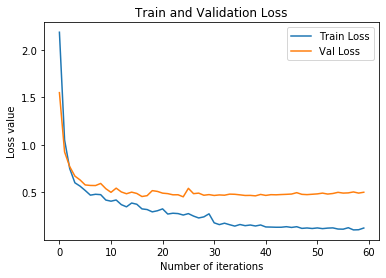

In [30]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Train and Validation Loss")
plt.legend(['Train Loss','Val Loss'])
plt.xlabel('Number of iterations')
plt.ylabel('Loss value')

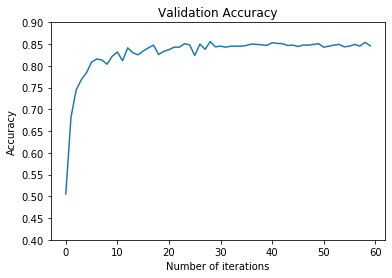

In [31]:
plt.plot(val_acc)
plt.title("Validation Accuracy")
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
_ = plt.yticks([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9])